# Predicting Heart Failure Eventuality from patient Clinical records

## Introduction

As Kenya commemorated the Word No-Tobacco day on May 31st 2018, the Ministry of health launched guidelines for the prevention and management of cardiovascular diseases. During the event presided over by Dr. Jackson Kioko, a major talking point was the creation of awareness in the link between tobacco products and cardiovascular diseases. In addition, Dr. Kioko  said that the guidelines were a major milestone in the country’s response to Non-Communicable Diseases (NCDs), which account for 50% of hospital admissions and 55% of hospital deaths in Kenya. Cardiovascular diseases (CVDs) are responsible for much of the NCD burden, he emphasized.Estimates show that 25% of hospital admissions and 13% of deaths in Kenya are due to CVDs. 

Heart failure is a chronic, progressive cardiovascular condition in which the heart muscle is unable to pump enough blood to meet the body's needs for blood and oxygen. Heart failure often develops after other conditions have damaged or weakened the heart. 

### Treatment

Heart failure is a chronic disease needing lifelong management. However, with treatment, signs and symptoms of heart failure can improve, and the heart sometimes becomes stronger.

### Dataset

The dataset used was obtained from https://www.kaggle.com/andrewmvd/heart-failure-clinical-data.
This dataset contains data collected from 299 patients, between the ages 40 - 100, who have heart-failure. The data has 12 columns that can be used to predict the mortality rate of heart failure. The columns include risk factors for cardiovascular diseases such as diabetes, high blood pressure, whether the patient smokes or not etc. 

The purspose of this activity is to see if the risk factors mentioned can be used to determine if heart failure patients respond to treatment or pass away.

In [1]:
# import the libraries

import pandas as pd
import numpy as np
from collections import Counter
import warnings
warnings.filterwarnings("ignore")

In [2]:
# use seeding to make sure results are reproducible
np.random.seed(7)

## Read and explore the data

In [3]:
data=pd.read_csv('heart_failure_clinical_records_dataset.csv', header='infer')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [5]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,299.0,60.833893,11.894809,40.0,51.0,60.0,70.0,95.0
anaemia,299.0,0.431438,0.496107,0.0,0.0,0.0,1.0,1.0
creatinine_phosphokinase,299.0,581.839465,970.287881,23.0,116.5,250.0,582.0,7861.0
diabetes,299.0,0.418060,0.494067,0.0,0.0,0.0,1.0,1.0
ejection_fraction,299.0,38.083612,11.834841,14.0,30.0,38.0,45.0,80.0
high_blood_pressure,299.0,0.351171,0.478136,0.0,0.0,0.0,1.0,1.0
platelets,299.0,263358.029264,97804.236869,25100.0,212500.0,262000.0,303500.0,850000.0
serum_creatinine,299.0,1.393880,1.034510,0.5,0.9,1.1,1.4,9.4
serum_sodium,299.0,136.625418,4.412477,113.0,134.0,137.0,140.0,148.0
sex,299.0,0.648829,0.478136,0.0,0.0,1.0,1.0,1.0


In [6]:
data.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

these are the columns that will be used to predict the death event of patients with heart failure.

In [7]:
data.sample(7).T

,268,240,278,176,202,98,125
age,45.0,70.0,50.0,69.0,70.0,60.0,43.0
anaemia,0.0,0.0,1.0,0.0,0.0,1.0,1.0
creatinine_phosphokinase,582.0,81.0,1051.0,1419.0,97.0,156.0,358.0
diabetes,1.0,1.0,1.0,0.0,0.0,1.0,0.0
ejection_fraction,38.0,35.0,30.0,40.0,60.0,25.0,50.0
high_blood_pressure,0.0,1.0,0.0,0.0,1.0,1.0,0.0
platelets,302000.0,533000.0,232000.0,105000.0,220000.0,318000.0,237000.0
serum_creatinine,0.9,1.3,0.7,1.0,0.9,1.2,1.3
serum_sodium,140.0,139.0,136.0,135.0,138.0,137.0,135.0
sex,0.0,0.0,0.0,1.0,1.0,0.0,0.0


In [8]:
data['DEATH_EVENT'].unique()
# show the unique values in the column

array([1, 0], dtype=int64)

the death event column will be used to predict the mortality rate. It contains ones and zeros, where 1 means the patient passed away from heart failure, and 0 means the patient did not die.

### Explore class Distribution of the data

In [9]:
classes = Counter(data['DEATH_EVENT'].values)

In [10]:
classes.most_common()

[(0, 203), (1, 96)]

203 patients responded to treatment and 96 passed away.

In [11]:
# Rename the DEATH_EVENT column to Class

data.rename(columns={'DEATH_EVENT': 'Class'}, inplace=True)

In [12]:
data = data.assign(platelet_count=pd.cut(data['platelets'], bins=[0, 150000, 450000, 800000], right=False, labels=['low', 'normal', 'high']))

Turn the platelet column into categorical data by creating bins(low, high, normal). The normal platelet count is between 150000 and 450000.

## Divide the Data into Train and Test Data  

We need to divide the data into two sepate dataframes randomly. The data is divided in the ratio 80: 20. 80% is used for trainning the model and 20% for testing

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
y = data['Class']

In [15]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: Class, dtype: int64

In [16]:
data = data.drop(['platelets'], axis=1) 
# Drop the platelets column

In [17]:
X = data.drop(['platelet_count'], axis=1)

- X_train, y_train is 80% of the data --> to be used for training
- X_test, y_test is 20% of the data --> to be used for testing

In [18]:
X.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,serum_creatinine,serum_sodium,sex,smoking,time,Class
0,75.0,0,582,0,20,1,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,2.7,116,0,0,8,1


In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=np.random.seed(7))

In [20]:
X_train.shape

(239, 12)

In [21]:
X_test.shape

(60, 12)

In [22]:
239/(60+239) * 100

79.93311036789298

approximately 80% has been set aside for training

# Task 1 : Implement Decision Tree

In [23]:
from sklearn import tree

In [24]:
X = X_train.drop(['Class'], axis=1)
X.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,serum_creatinine,serum_sodium,sex,smoking,time
188,60.667,1,151,1,40,1,1.0,136,0,0,172
94,58.000,0,144,1,38,1,0.7,142,0,0,83
126,46.000,0,168,1,17,1,2.1,124,0,0,100
242,40.000,0,90,0,35,0,1.1,136,1,1,212
78,75.000,1,203,1,38,1,0.6,131,1,1,74


In [25]:
y = y_train

- Initialize the classifier that will use entropy to classify to a maximum depth of 3

In [26]:
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [27]:
clf=clf.fit(X, y)

#### Plot the Decision tree

In [28]:
import pydotplus
from IPython.display import Image

In [29]:
dot_data = tree.export_graphviz(clf, feature_names=X.columns, class_names=['Living', 'Passed_Away'], filled=True, out_file=None)

In [30]:
graph = pydotplus.graph_from_dot_data(dot_data)

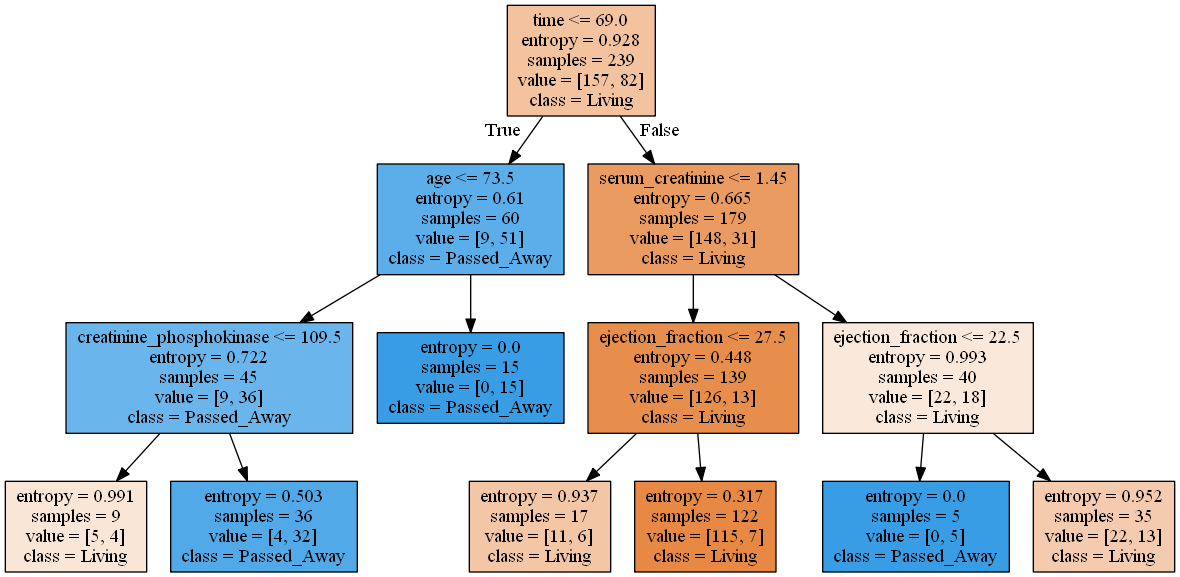

In [31]:
Image(graph.create_png())

From the Decision tree above, it can be seen that time is the most effective dividing the data into classes of either passed or survived. Other columns such as age, serum_creatinine, ejection_fraction, creatinine_phosphokinase are also effective as compared to the other risk factor columns such as diabetes, high blood pressure, anaemia

#### Convert the important classification Data into categorical data For easier working

- For example, time < 70 is converted to 1 and the ones greater that are 0
- ejection_fraction < 28


In [32]:
data["time"] = data["time"].map(lambda x: 1 if (x < 70) else 0 )

In [33]:
data["ejection_fraction"] = data["ejection_fraction"].map(lambda x: 1 if (x < 28) else 0 )

In [34]:
data["creatinine_phosphokinase"] = data["creatinine_phosphokinase"].map(lambda x: 1 if (x < 110) else 0 )

In [35]:
data["age"] = data["age"].map(lambda x: 1 if (x < 75) else 0 )

In [36]:
data["serum_creatinine"] = data["serum_creatinine"].map(lambda x: 1 if (x < 1.46) else 0 )

In [37]:
# Print out the new dataset
data.sample(7)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,serum_creatinine,serum_sodium,sex,smoking,time,Class,platelet_count
161,1,1,0,0,0,0,1,139,1,1,0,0,normal
224,1,0,0,1,1,0,1,138,1,0,0,0,high
127,1,1,0,1,0,0,1,137,0,0,0,0,normal
70,1,0,0,0,0,0,1,140,1,1,1,0,normal
260,1,0,1,0,0,0,1,138,1,0,0,0,normal
91,1,0,0,1,0,0,1,133,1,0,0,0,normal
19,1,1,0,1,0,0,0,121,0,0,1,1,low


In [38]:
X = data.drop(['serum_sodium', 'platelet_count'], axis=1)

In [39]:
y = data["Class"]

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=np.random.seed(7))

In [41]:
X_train.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,serum_creatinine,sex,smoking,time,Class
188,1,1,0,1,0,1,1,0,0,0,0
94,1,0,0,1,0,1,1,0,0,0,0
126,1,0,0,1,1,1,0,0,0,0,1
242,1,0,1,0,0,0,1,1,1,0,0
78,0,1,0,1,0,1,1,1,1,0,0


In [42]:
X = X_train.drop(['Class'], axis=1)
y = y_train

In [43]:
X.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,serum_creatinine,sex,smoking,time
188,1,1,0,1,0,1,1,0,0,0
94,1,0,0,1,0,1,1,0,0,0
126,1,0,0,1,1,1,0,0,0,0
242,1,0,1,0,0,0,1,1,1,0
78,0,1,0,1,0,1,1,1,1,0


#### Plot the Decision tree with the new data

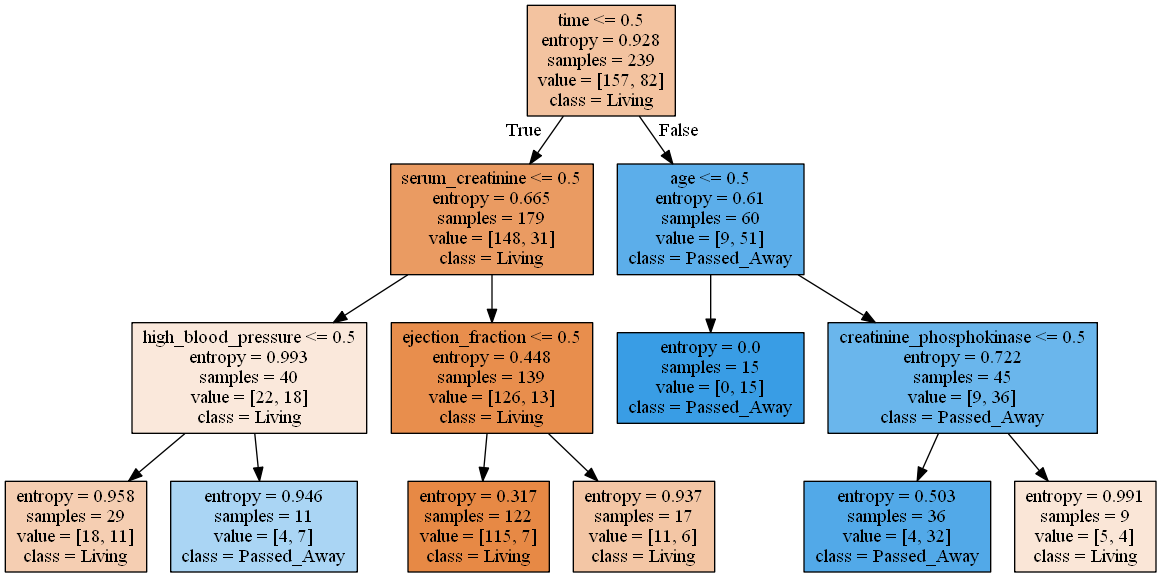

In [44]:
clf=clf.fit(X, y)
dot_data = tree.export_graphviz(clf, feature_names=X.columns, class_names=['Living', 'Passed_Away'], filled=True, out_file=None)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

Given this is medical data, the classes are not clear cut. However for the best possible results, age, time, serum_creatinine high blood pressure and creatinine phosphokinase are used

## Testing the Decision Tree

In [45]:
y_test.head()

268    0
240    0
278    0
176    0
202    0
Name: Class, dtype: int64

In [46]:
X_test = X_test.drop(['Class'], axis=1)

In [47]:
predY = clf.predict(X_test)

In [48]:
from sklearn.metrics import accuracy_score

In [49]:
print('Accuracy on test data is %.2f'%(accuracy_score(y_test, predY) * 100.))

Accuracy on test data is 86.67


The decision tree predicts the mortality rate with an accuracy of 88.67%
- Lets see how that compares to using logistic regression.

# Logistic Regression

In [50]:
data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,serum_creatinine,serum_sodium,sex,smoking,time,Class,platelet_count
0,0,0,0,0,1,1,0,130,1,0,1,1,normal
1,1,0,0,0,0,0,1,136,1,0,1,1,normal
2,1,0,0,0,1,0,1,129,1,1,1,1,normal
3,1,1,0,0,1,0,0,137,1,0,1,1,normal
4,1,1,0,1,1,0,0,116,0,0,1,1,normal


In [51]:
data = data.drop(['serum_sodium', 'platelet_count'], axis=1)

In [52]:
data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,serum_creatinine,sex,smoking,time,Class
0,0,0,0,0,1,1,0,1,0,1,1
1,1,0,0,0,0,0,1,1,0,1,1
2,1,0,0,0,1,0,1,1,1,1,1
3,1,1,0,0,1,0,0,1,0,1,1
4,1,1,0,1,1,0,0,0,0,1,1


In [53]:
# X the independent variable is defined in capital
X=data.iloc[:, 0:10].values.astype(int)

In [54]:
X

array([[0, 0, 0, ..., 1, 0, 1],
       [1, 0, 0, ..., 1, 0, 1],
       [1, 0, 0, ..., 1, 1, 1],
       ...,
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 1, 1, 0],
       [1, 0, 0, ..., 1, 1, 0]])

In [55]:
y=data.iloc[:,10].values.astype(int)

#### Split the data after selecting the columns that are usefull(have categorical data)

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=np.random.seed(7))

In [57]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, classification_report
from sklearn.linear_model import LogisticRegression
import wandb
import time

### Define a pipeline function to be used in algorithm

In [58]:
def train_eval_pipeline(model, train_data, test_data, name):
    #initialize wandb and give proj a name
    wandb.init(project='ML for heart failure prediction', name=name)
    #assign the data
    (X_train, y_train) = train_data
    (X_test, y_test) = test_data
    
    #Train the model
    start = time.time()
    model.fit(X_train, y_train)
    end = time.time() - start
    prediction = model.predict(X_test)
    
    wandb.log({"accuracy": accuracy_score(y_test, prediction) * 100, "precision": precision_recall_fscore_support(y_test, prediction, average='macro')[0], "recall" : precision_recall_fscore_support(y_test, prediction, average='macro')[1], "training_time" : end})
    print("Accuracy of the Logistic Regression classifier with default hyperparameter values {0: .2f}%".format(accuracy_score(y_test, prediction)*100.))
    print("\n")
    print("---classification report of the Logistic Regression Classifier with default parameter values ---")
    print("\n")
    print(classification_report(y_test, prediction, target_names=["Passed on", "Surivived"]))

In [59]:
logreg = LogisticRegression()

In [60]:
logreg

LogisticRegression()

In [61]:
train_eval_pipeline(logreg, (X_train, y_train), (X_test, y_test), "Logistic_Regression_Predicting_Heart_Failure")

wandb: Currently logged in as: austinmula (use `wandb login --relogin` to force relogin)
wandb: wandb version 0.12.4 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


Accuracy of the Logistic Regression classifier with default hyperparameter values  88.33%


---classification report of the Logistic Regression Classifier with default parameter values ---


              precision    recall  f1-score   support

   Passed on       0.91      0.93      0.92        46
   Surivived       0.77      0.71      0.74        14

    accuracy                           0.88        60
   macro avg       0.84      0.82      0.83        60
weighted avg       0.88      0.88      0.88        60



Comments
- The logistic regression algorithm produces an accuracy of 88.33% which is better than the Decision tree.

# Perform Hyperparameter Tunning to improve accuracy

We need to define the grid of the values for the hyperparameters that we need to tune. For this example we use the random search for hyperparameter tuning

In [62]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

The Grid values consist of a penalty, C, maximum number of iterations and tolerance

In [63]:
penalty = ["l1", "l2"]

In [64]:
C= uniform(loc=0, scale=4)

In [65]:
max_iter = [100, 150, 200, 250]

In [66]:
tol = [0.01, 0.001, 0.0001]

In [67]:
# Create a dict where tol and max_iter are keys and lists
# of their values are the corresponding values

In [68]:
param_grid = dict(penalty = penalty, C = C, tol = tol, max_iter = max_iter)

- Now that we have the grid, we look for a set of hyperpameter values. RandomizedSearchCV looks for the appropriate values

In [69]:
random_model = RandomizedSearchCV(estimator= logreg, param_distributions=param_grid, cv=5)

In [70]:
# Fit the model to the data

In [71]:
random_model_result=random_model.fit(X_train, y_train)

In [72]:
best_score, best_params = random_model_result.best_score_,random_model_result.best_params_

In [73]:
print('Best score: %.2f using %s'%(best_score* 100.,best_params))

Best score: 84.08 using {'C': 1.1574912463137448, 'max_iter': 100, 'penalty': 'l2', 'tol': 0.0001}


Comments 
- Random search did not help much in boosting the accuracy in this case. Lets use the hyperparamameter values and train another Logistic Regression Model with the suggested values

#### Logging the results of the hyperparameters in wandb

In [74]:
config=wandb.config

In [75]:
config.tol = 0.0001

In [76]:
config.C = 1.1574912463137448

In [77]:
config.penalty = 'l2'

#### Plug in new Hyperparameter values

In [78]:
logreg = LogisticRegression(tol=config.tol, penalty= config.penalty, max_iter=100, C=config.C)

In [79]:
logreg

LogisticRegression(C=1.1574912463137448)

In [80]:
train_eval_pipeline(logreg, (X_train, y_train), (X_test, y_test), "Logistic_Regression_Predicting_Heart_Failure")

accuracy,88.33333
precision,0.84206
recall,0.82453
training_time,0.03307


accuracy,▁
precision,▁
recall,▁
training_time,▁


wandb: wandb version 0.12.4 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


Accuracy of the Logistic Regression classifier with default hyperparameter values  88.33%


---classification report of the Logistic Regression Classifier with default parameter values ---


              precision    recall  f1-score   support

   Passed on       0.91      0.93      0.92        46
   Surivived       0.77      0.71      0.74        14

    accuracy                           0.88        60
   macro avg       0.84      0.82      0.83        60
weighted avg       0.88      0.88      0.88        60



# Conclussion

In the end, the logistic regression turned out to have a better accuracy score as compared to the to the Decision tree. The decision tree had an accuracy of 86.67% whilst the logistic regression had an accuracy of 88.33%. However, I think using them together on the same dataset improved the overall accuracy score. 

This is because, running the decision tree algorithm on the initial data helped me to know which columns were important in prediction. Coming into this exercise, I though the risk factors such as smoking, diabetes and anaemia were going to be the key predictors of the mortality rate. However, the decision tree showed clearly that other columns such as age, time and serum_creatinine were the key columns. That is why I changed the data in these columns to categorical data(code lines 32 - 36)

- Note: This is not to mean that, the other columns such as high blood pressure, anaeamia and diabetes were not helpful.

When I ran the logistic regression using only the risk factor columns such as smoking, high blood pressure, anaeamia and diabetes, the algorithm produced an accuracy of about only 76%, as logged on wandb. Hence, I think using both methods would be an advantage.